1-Read in the image
2-detetct edges and contours
3-use esay ocr to read the text
4-render the result

we need easy ocr for using this so we install pytorch and then easy ocr

In [116]:
!pip install easyocr

In [117]:
import easyocr
import imutils
import numpy as np
import matplotlib.pyplot as plt
import cv2

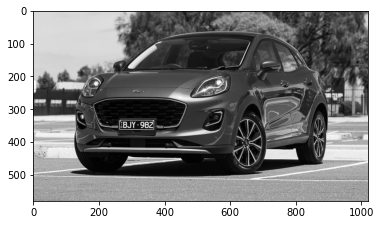

In [270]:
image = cv2.imread('ANPRwithPython-main/image3.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

# Apply filters and do edge detection

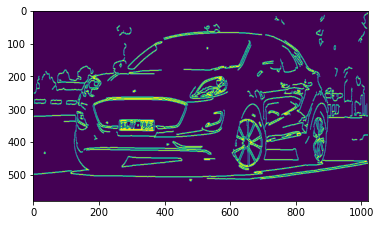

In [271]:
blur = cv2.GaussianBlur(image,ksize=(7,7),sigmaX=0)
edge = cv2.Canny(blur,90,200)
edge = cv2.dilate(edge,kernel=(3,3),iterations=2)
plt.imshow(edge)

# Now we need to detect a Contour which has 4 points in it

In [272]:
keypoints = cv2.findContours(edge.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours,key = cv2.contourArea,reverse=True)[:10]#first top ten contours

In [273]:
list = []
for c in contours:
    length = cv2.arcLength(c,True)
    approx = cv2.approxPolyDP(c,0.05*length,True)
    #high the number then most rough the estimation
    if (len(approx)==4):
        list = approx
        break

In [274]:
list

array([[[262, 337]],

       [[266, 366]],

       [[369, 365]],

       [[366, 333]]], dtype=int32)

# Masking the number Plate

In [275]:
mask = np.zeros_like(image)

In [276]:
new_cont = cv2.drawContours(mask,[list],0,255,-1)

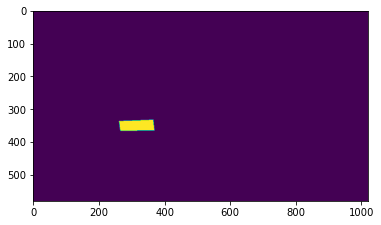

In [277]:
plt.imshow(new_cont)

In [278]:
masked = cv2.bitwise_and(image,image,mask =mask)

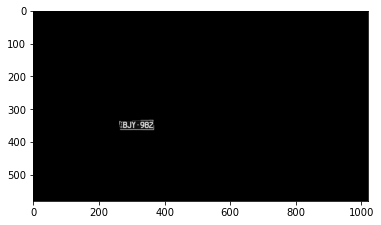

In [279]:
plt.imshow(masked,cmap='gray')

In [280]:
(x,y) = np.where(mask==255)
(x1,y1) = (np.min(x),np.min(y))
(x2,y2) = (np.max(x),np.max(y))

In [281]:
final = masked[x1:x2+1,y1:y2+1]

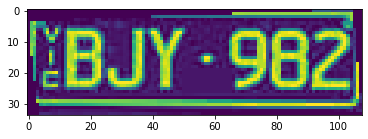

In [282]:
plt.imshow(final)

In [283]:
final = cv2.cvtColor(final,cv2.COLOR_BGR2RGB)

# Easy OCR implementation

In [284]:
#give in the language

In [285]:
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [286]:
result = reader.readtext(final)

In [287]:
result

[([[0, 0], [108, 0], [108, 34], [0, 34]], 'TBJY_982}', 0.1375850458324968)]